#1.Libary

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#2.Import Data

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Uber Customer Reviews Dataset (2024)/uber_reviews_without_reviewid.csv')

In [5]:
data

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,User_0,NaN,Good,5,0,4.556.10005,2024-12-18 17:17:19,NaN,NaN,4.556.10005
1,User_1,NaN,Nice,5,0,4.556.10005,2024-12-18 17:17:17,NaN,NaN,4.556.10005
2,User_2,NaN,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42,NaN,NaN,4.532.10001
3,User_3,NaN,Good,4,0,4.556.10005,2024-12-18 17:08:27,NaN,NaN,4.556.10005
4,User_4,NaN,exllence,5,0,4.556.10005,2024-12-18 17:08:16,NaN,NaN,4.556.10005
...,...,...,...,...,...,...,...,...,...,...
11995,User_11995,NaN,Excellent!!!,5,0,4.553.10000,2024-11-24 21:59:16,NaN,NaN,4.553.10000
11996,User_11996,NaN,Worst experience after 10pm in Hyde cityno aut...,5,0,4.552.10000,2024-11-24 21:56:10,NaN,NaN,4.552.10000
11997,User_11997,NaN,Exceptional,5,0,4.552.10000,2024-11-24 21:52:21,NaN,NaN,4.552.10000
11998,User_11998,NaN,Good Service.,5,0,4.553.10000,2024-11-24 21:50:30,NaN,NaN,4.553.10000


#3.Preprocessing Data

In [6]:
data = data.drop(columns=['userImage'])
data = data.drop(columns=['replyContent'])
data = data.drop(columns=['repliedAt'])

In [7]:
data

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,User_0,Good,5,0,4.556.10005,2024-12-18 17:17:19,4.556.10005
1,User_1,Nice,5,0,4.556.10005,2024-12-18 17:17:17,4.556.10005
2,User_2,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42,4.532.10001
3,User_3,Good,4,0,4.556.10005,2024-12-18 17:08:27,4.556.10005
4,User_4,exllence,5,0,4.556.10005,2024-12-18 17:08:16,4.556.10005
...,...,...,...,...,...,...,...
11995,User_11995,Excellent!!!,5,0,4.553.10000,2024-11-24 21:59:16,4.553.10000
11996,User_11996,Worst experience after 10pm in Hyde cityno aut...,5,0,4.552.10000,2024-11-24 21:56:10,4.552.10000
11997,User_11997,Exceptional,5,0,4.552.10000,2024-11-24 21:52:21,4.552.10000
11998,User_11998,Good Service.,5,0,4.553.10000,2024-11-24 21:50:30,4.553.10000


In [8]:
data.dtypes

,0
userName,object
content,object
score,int64
thumbsUpCount,int64
reviewCreatedVersion,object
at,object
appVersion,object


In [9]:
columns = ['userName', 'content', 'reviewCreatedVersion', 'appVersion']
le = LabelEncoder()

for column in columns:
  data[column] = le.fit_transform(data[column])

In [10]:
data

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,0,2021,5,0,141,2024-12-18 17:17:19,141
1,1,4074,5,0,141,2024-12-18 17:17:17,141
2,3112,6597,5,0,117,2024-12-18 17:09:42,117
3,4223,2021,4,0,141,2024-12-18 17:08:27,141
4,5334,7651,5,0,141,2024-12-18 17:08:16,141
...,...,...,...,...,...,...,...
11995,2219,1649,5,0,138,2024-11-24 21:59:16,138
11996,2220,7433,5,0,137,2024-11-24 21:56:10,137
11997,2221,1667,5,0,137,2024-11-24 21:52:21,137
11998,2222,2061,5,0,138,2024-11-24 21:50:30,138


In [11]:
data = data.drop(columns=['thumbsUpCount'])

In [12]:
scaler = MinMaxScaler()
data[['userName', 'content', 'reviewCreatedVersion',
      'appVersion']] = scaler.fit_transform(data[['userName', 'content', 'reviewCreatedVersion',
      'appVersion']])

In [13]:
data

,userName,content,score,reviewCreatedVersion,at,appVersion
0,0.000000,0.247338,5,0.992958,2024-12-18 17:17:19,0.992958
1,0.000083,0.498593,5,0.992958,2024-12-18 17:17:17,0.992958
2,0.259355,0.807368,5,0.823944,2024-12-18 17:09:42,0.823944
3,0.351946,0.247338,4,0.992958,2024-12-18 17:08:27,0.992958
4,0.444537,0.936360,5,0.992958,2024-12-18 17:08:16,0.992958
...,...,...,...,...,...,...
11995,0.184932,0.201811,5,0.971831,2024-11-24 21:59:16,0.971831
11996,0.185015,0.909681,5,0.964789,2024-11-24 21:56:10,0.964789
11997,0.185099,0.204014,5,0.964789,2024-11-24 21:52:21,0.964789
11998,0.185182,0.252234,5,0.971831,2024-11-24 21:50:30,0.971831


In [14]:
def categorize_score(score):
    if score in [4, 5]:
        return 2
    elif score == 3:
        return 1
    elif score in [1, 2]:
        return 0

In [15]:
data

,userName,content,score,reviewCreatedVersion,at,appVersion
0,0.000000,0.247338,5,0.992958,2024-12-18 17:17:19,0.992958
1,0.000083,0.498593,5,0.992958,2024-12-18 17:17:17,0.992958
2,0.259355,0.807368,5,0.823944,2024-12-18 17:09:42,0.823944
3,0.351946,0.247338,4,0.992958,2024-12-18 17:08:27,0.992958
4,0.444537,0.936360,5,0.992958,2024-12-18 17:08:16,0.992958
...,...,...,...,...,...,...
11995,0.184932,0.201811,5,0.971831,2024-11-24 21:59:16,0.971831
11996,0.185015,0.909681,5,0.964789,2024-11-24 21:56:10,0.964789
11997,0.185099,0.204014,5,0.964789,2024-11-24 21:52:21,0.964789
11998,0.185182,0.252234,5,0.971831,2024-11-24 21:50:30,0.971831


In [16]:
data.isna().sum()

,0
userName,0
content,0
score,0
reviewCreatedVersion,0
at,0
appVersion,0


In [17]:
data.dtypes

,0
userName,float64
content,float64
score,int64
reviewCreatedVersion,float64
at,object
appVersion,float64


#4.Model Training and Evaluation

In [18]:
X = data[['userName', 'content', 'reviewCreatedVersion', 'appVersion']]
y = data['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=48)

In [19]:
model_knn = KNeighborsClassifier(n_neighbors=3)

cross_val_score_knn = cross_val_score(model_knn, X, y, cv=5, scoring='accuracy')

print(f"cross score: {cross_val_score_knn}")
print(f"mean: {cross_val_score_knn.mean()}")
print(f"std: {cross_val_score_knn.std()}")

model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

cross score: [0.5275     0.52666667 0.4925     0.52083333 0.58458333]
mean: 0.5304166666666666
std: 0.029953667926019053


In [20]:
accuracy_knn = accuracy_score(y_pred_knn, y_test)
classifiaction_knn = classification_report(y_pred_knn, y_test)
confusion_knn = confusion_matrix(y_pred_knn, y_test)

print(f"Accuracy knn: {accuracy_knn}")
print(f"classification knn: {classifiaction_knn}")
print(f"confusion knn: {confusion_knn}")

Accuracy knn: 0.6103125
classification knn:               precision    recall  f1-score   support

           1       0.42      0.38      0.40      2350
           2       0.02      0.04      0.03       131
           3       0.01      0.02      0.02       141
           4       0.01      0.07      0.02       138
           5       0.78      0.72      0.75      6840

    accuracy                           0.61      9600
   macro avg       0.25      0.25      0.24      9600
weighted avg       0.66      0.61      0.63      9600

confusion knn: [[ 896  102   77  137 1138]
 [  39    5    2    8   77]
 [  29    2    3   12   95]
 [  30    6    3    9   90]
 [1116  145  165  468 4946]]


In [21]:
model_randomforest = RandomForestClassifier(n_estimators=100, random_state=48)

cross_val_score_randomforest = cross_val_score(model_randomforest, X, y, cv=5, scoring='accuracy')

print(f"cross score: {cross_val_score_randomforest}")
print(f"mean: {cross_val_score_randomforest.mean()}")
print(f"std: {cross_val_score_randomforest.std()}")

model_randomforest.fit(X_train, y_train)
y_pred_randomforest = model_randomforest.predict(X_test)

cross score: [0.54416667 0.63458333 0.57083333 0.57208333 0.63083333]
mean: 0.5905
std: 0.03589664948772302


In [23]:
accuracy_randomforest = accuracy_score(y_pred_randomforest, y_test)
classification_randomforest = classification_report(y_pred_randomforest, y_test)
confusion_randomforest = confusion_matrix(y_pred_randomforest, y_test)

print(f"accuracy: {accuracy_randomforest}")
print(f"classification: {classification_randomforest}")
print(f"confusion: {confusion_randomforest}")

accuracy: 0.6679166666666667
classification:               precision    recall  f1-score   support

           1       0.42      0.51      0.46      1768
           2       0.02      0.08      0.04        77
           3       0.02      0.05      0.03       110
           4       0.03      0.08      0.04       231
           5       0.86      0.74      0.80      7414

    accuracy                           0.67      9600
   macro avg       0.27      0.29      0.27      9600
weighted avg       0.75      0.67      0.70      9600

confusion: [[ 896   91   76   81  624]
 [  38    6    2    4   27]
 [  33    6    5   14   52]
 [  41   11    5   18  156]
 [1102  146  162  517 5487]]


In [24]:
model_svm = SVC(random_state=48)
cross_val_score_svm = cross_val_score(model_svm, X, y, cv=5, scoring='accuracy')

print(f"cross score: {cross_val_score_svm}")
print(f"mean: {cross_val_score_svm.mean()}")
print(f"std: {cross_val_score_svm.std()}")

model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

cross score: [0.6625     0.66083333 0.66208333 0.66375    0.65958333]
mean: 0.66175
std: 0.0014288690166235096


In [25]:
accuracy_svm = accuracy_score(y_pred_svm, y_test)
classification_svm = classification_report(y_pred_svm, y_test)
confusion_svm = confusion_matrix(y_pred_svm, y_test)

print(f"accuracy: {accuracy_svm}")
print(f"classification: {classification_svm}")
print(f"confusion: {confusion_svm}")

accuracy: 0.6610416666666666
classification:               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.66      0.80      9600

    accuracy                           0.66      9600
   macro avg       0.20      0.13      0.16      9600
weighted avg       1.00      0.66      0.80      9600

confusion: [[   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [2110  260  250  634 6346]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
model_navies = GaussianNB()
cross_val_score_navies = cross_val_score(model_navies, X, y, cv=5, scoring='accuracy')

print(f"cross score: {cross_val_score_navies}")
print(f"mean: {cross_val_score_navies.mean()}")
print(f"std: {cross_val_score_navies.std()}")

model_navies.fit(X_train, y_train)
y_pred_naives = model_navies.predict(X_test)

cross score: [0.65083333 0.65625    0.65041667 0.64375    0.64416667]
mean: 0.6490833333333333
std: 0.004665178334092793


In [27]:
accuracy_navies = accuracy_score(y_pred_naives, y_test)
classification_navies = classification_report(y_pred_naives, y_test)
confusion_navies = confusion_matrix(y_pred_naives, y_test)

print(f"accuracy: {accuracy_navies}")
print(f"classification: {classification_navies}")
print(f"Confusion: {confusion_navies}")

accuracy: 0.6533333333333333
classification:               precision    recall  f1-score   support

           1       0.03      0.30      0.06       214
           2       0.02      0.06      0.03        80
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.98      0.67      0.79      9306

    accuracy                           0.65      9600
   macro avg       0.21      0.21      0.18      9600
weighted avg       0.95      0.65      0.77      9600

Confusion: [[  64    7    7   16  120]
 [  43    5    3    6   23]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [2003  248  240  612 6203]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
model_tree = ExtraTreesClassifier(n_estimators=100, random_state=48)
cross_val_score_tree = cross_val_score(model_tree, X, y, cv=5, scoring='accuracy')

print(f"cross score: {cross_val_score_tree}")
print(f"mean: {cross_val_score_tree.mean()}")
print(f"std: {cross_val_score_tree.std()}")

model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

cross score: [0.59041667 0.60125    0.53875    0.58333333 0.59083333]
mean: 0.5809166666666667
std: 0.02184446281224503


In [29]:
accuracy_tree= accuracy_score(y_pred_tree, y_test)
classification_tree = classification_report(y_pred_tree, y_test)
confusion_tree = confusion_matrix(y_pred_tree, y_test)

print(f"accuracy: {accuracy_tree}")
print(f"classification: {classification_tree}")
print(f"confusion: {confusion_tree}")

accuracy: 0.6459375
classification:               precision    recall  f1-score   support

           1       0.39      0.48      0.43      1718
           2       0.02      0.06      0.03       107
           3       0.03      0.05      0.04       151
           4       0.04      0.07      0.05       352
           5       0.84      0.73      0.78      7272

    accuracy                           0.65      9600
   macro avg       0.27      0.28      0.27      9600
weighted avg       0.71      0.65      0.67      9600

confusion: [[ 830   89   65   84  650]
 [  45    6    6    5   45]
 [  45    6    8   16   76]
 [  68   11    9   23  241]
 [1122  148  162  506 5334]]


#5.Visualization

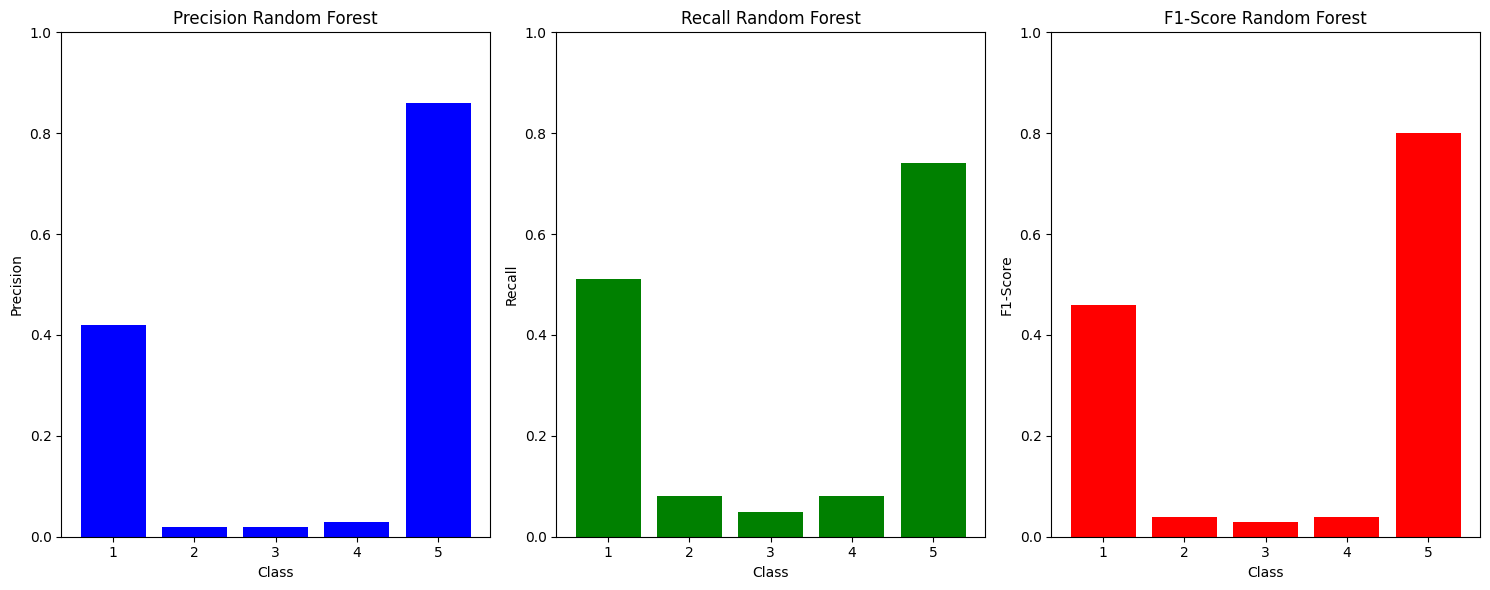

In [33]:
labels = ['1', '2', '3', '4', '5']
precision = [0.42, 0.02, 0.02, 0.03, 0.86]
recall = [0.51, 0.08, 0.05, 0.08, 0.74]
f1_score = [0.46, 0.04, 0.03, 0.04, 0.80]
support = [1768, 77, 110, 231, 7414]

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

axes[0].bar(labels, precision, color='blue')
axes[0].set_title('Precision Random Forest')
axes[0].set_ylim(0, 1)
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Precision')

axes[1].bar(labels, recall, color='green')
axes[1].set_title('Recall Random Forest')
axes[1].set_ylim(0, 1)
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Recall')

axes[2].bar(labels, f1_score, color='red')
axes[2].set_title('F1-Score Random Forest')
axes[2].set_ylim(0, 1)
axes[2].set_xlabel('Class')
axes[2].set_ylabel('F1-Score')

plt.tight_layout()
plt.show()

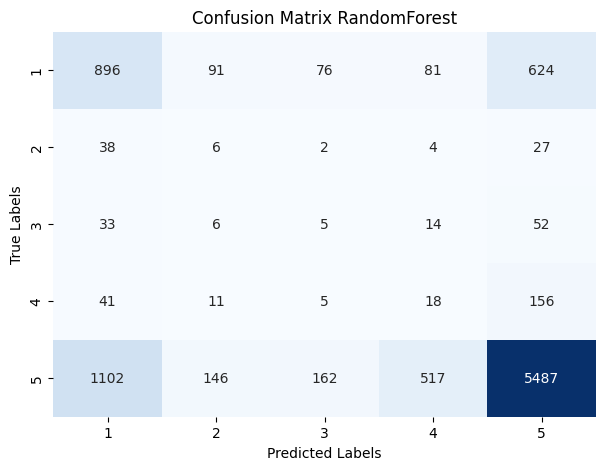

In [34]:
cm = np.array([[896, 91, 76, 81, 624],
               [38, 6, 2, 4, 27],
               [33, 6, 5, 14, 52],
               [41, 11, 5, 18, 156],
               [1102, 146, 162, 517, 5487]])

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Confusion Matrix RandomForest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()